In [0]:
# パッケージ のインポート
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation, Dense, Dropout # 活性化関数、全結合層、Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# データセットの準備
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
# データセットのシェイプの確認
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
# データセットのデータの確認
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [5]:
# データセットのラベルの確認
print(train_labels[:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [0]:
# データセットのシャッフルの前処理
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [0]:
# データセットの正規化の前処理
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [8]:
# データセットの前処理後のデータの確認
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.397253,1.412057,-1.126646,-0.256833,-1.027385,0.726354,-1.000164,0.023834,-0.511142,-0.047533,-1.490674,0.415841,-0.836487
1,0.087846,-0.483615,1.028326,-0.256833,1.371293,-3.817250,0.676891,-1.049006,1.675886,1.565287,0.784476,-0.000885,-0.775760
2,-0.395379,1.201427,-0.690066,-0.256833,-0.942023,0.827918,-0.939245,0.259915,-0.626249,-0.914123,-0.398602,0.448077,-1.347144
3,-0.403759,3.097099,-1.022279,-0.256833,-1.095675,0.351129,-1.480347,2.364762,-0.626249,-0.330379,-0.262093,0.400521,-0.880652
4,-0.348692,-0.483615,-0.720935,-0.256833,-0.455458,3.467186,0.501302,-0.417158,-0.165822,-0.595170,-0.489608,0.289557,-1.119419


In [0]:
# モデルの作成
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [0]:
# コンパイル
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])

In [0]:
# Earlystoppingの準備
early_stop = EarlyStopping(monitor='val_loss', patience=20)

In [12]:
# 学習
history = model.fit(train_data, train_labels, epochs=500, validation_split=0.2, callbacks=[early_stop])

Epoch 1/500
11/11 [==============================] - 0s 16ms/step - loss: 558.6165 - mae: 21.7132 - val_loss: 581.2275 - val_mae: 22.2622
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 507.9992 - mae: 20.4359 - val_loss: 523.6488 - val_mae: 20.9268
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 451.0885 - mae: 18.9495 - val_loss: 456.3342 - val_mae: 19.2557
Epoch 4/500
11/11 [==============================] - 0s 4ms/step - loss: 384.6806 - mae: 17.1110 - val_loss: 375.0117 - val_mae: 17.1188
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 306.3705 - mae: 14.9546 - val_loss: 281.4829 - val_mae: 14.5141
Epoch 6/500
11/11 [==============================] - 0s 13ms/step - loss: 220.2552 - mae: 12.4733 - val_loss: 186.3013 - val_mae: 11.4898
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: 142.0870 - mae: 9.7659 - val_loss: 110.2382 - val_mae: 8.3814
Epoch 8/500
11/11 [======================

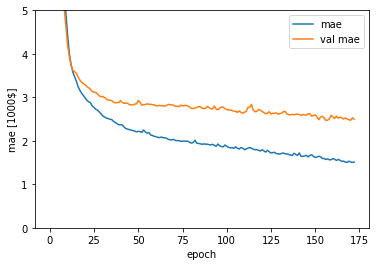

In [13]:
# グラフの表示
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.ylabel('mae [1000$]')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.ylim([0,5])
plt.show()

In [14]:
# 評価
test_loss, test_mae = model.evaluate(test_data, test_labels)
print('loss: {:.3f}\nmae: {:.3f}'.format(test_loss, test_mae))

4/4 [==============================] - 0s 2ms/step - loss: 17.0268 - mae: 2.7397
loss: 17.027
mae: 2.740


In [16]:
# 推論する値段の表示
print('fact_prices: ', np.round(test_labels[:10]))

# 推論した値段の表示
test_predictions = model.predict(test_data[:10]).flatten()
print('predicted_prices: ', np.round(test_predictions))

fact_prices:  [ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
predicted_prices:  [ 8. 18. 22. 34. 26. 21. 24. 22. 20. 23.]
